In [1]:
import scipy
from scipy import stats
import scipy.integrate as spi
import numpy as np
import pylab as pl
import math
%matplotlib inline

def siModel(t):
    i = N * math.pow(math.e, N*t)/(N-1+math.pow(math.e, N*t))

In [79]:
beta = 0.33

t_start = 0
t_end = 60      # Transmit Time

N = 6*math.pow(10,6)


I0 = 3     # Initial Number of Infected
S0 = N - I0    # Initial Number of Susceptible

INPUT = (S0, I0)

In [80]:
def model_SI(INP,t):  
    
    Y=np.zeros((2))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N  
    Y[1] = beta * V[0] * V[1]/N
    return Y   # For odeint

In [81]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SI, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs


In [82]:
RES

array([[5.99999700e+06, 3.00000000e+00],
       [5.99999583e+06, 4.17290356e+00],
       [5.99999420e+06, 5.80437436e+00],
       [5.99999193e+06, 8.07369674e+00],
       [5.99998877e+06, 1.12302490e+01],
       [5.99998438e+06, 1.56209071e+01],
       [5.99997827e+06, 2.17281617e+01],
       [5.99996978e+06, 3.02231378e+01],
       [5.99995796e+06, 4.20393387e+01],
       [5.99994152e+06, 5.84752205e+01],
       [5.99991866e+06, 8.13368586e+01],
       [5.99988686e+06, 1.13136379e+02],
       [5.99984263e+06, 1.57367938e+02],
       [5.99978111e+06, 2.18891543e+02],
       [5.99969553e+06, 3.04466819e+02],
       [5.99957650e+06, 4.23495242e+02],
       [5.99941095e+06, 5.89052133e+02],
       [5.99918068e+06, 8.19321299e+02],
       [5.99886041e+06, 1.13958898e+03],
       [5.99841499e+06, 1.58501426e+03],
       [5.99779552e+06, 2.20447665e+03],
       [5.99693408e+06, 3.06591637e+03],
       [5.99573626e+06, 4.26374017e+03],
       [5.99407092e+06, 5.92907943e+03],
       [5.991756

In [83]:
RES[1][1]

4.172903555700173

Text(0, 0.5, 'Susceptibles and Infecteds')

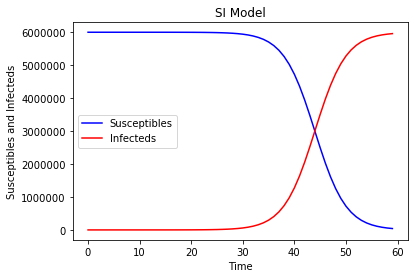

In [84]:
#Ploting
# pl.subplot(211)
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.legend(loc=0)
pl.title('SI Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles and Infecteds')

## SIR

In [26]:
beta = 6.0899999999999554
gamma = 5.699999999999964

t_start = 0.0
t_end = 60      # Transmit Time

N = 6*math.pow(10,6)
R0 = 0
I0 = 3      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

In [27]:
def model_SIR(INP,t):  
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint


In [28]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SIR, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

In [29]:
RES

array([[5.99999700e+06, 3.00000000e+00, 0.00000000e+00],
       [5.99997466e+06, 4.43088191e+00, 2.09136608e+01],
       [5.99994165e+06, 6.54405665e+00, 5.18018863e+01],
       [5.99989291e+06, 9.66465004e+00, 9.74203794e+01],
       [5.99982094e+06, 1.42724635e+01, 1.64790431e+02],
       [5.99971465e+06, 2.10752604e+01, 2.64276047e+02],
       [5.99955771e+06, 3.11164229e+01, 4.11170589e+02],
       [5.99932604e+06, 4.59326809e+01, 6.28030901e+02],
       [5.99898411e+06, 6.77842925e+01, 9.48104445e+02],
       [5.99847966e+06, 9.99889724e+01, 1.42034680e+03],
       [5.99773586e+06, 1.47402012e+02, 2.11673611e+03],
       [5.99664003e+06, 2.17097199e+02, 3.14286791e+03],
       [5.99502753e+06, 3.19312075e+02, 4.65315359e+03],
       [5.99265898e+06, 4.68715719e+02, 6.87230394e+03],
       [5.98918898e+06, 6.86012344e+02, 1.01250111e+04],
       [5.98412475e+06, 9.99757656e+02, 1.48754909e+04],
       [5.97677501e+06, 1.44794194e+03, 2.17770441e+04],
       [5.96619417e+06, 2.07823

Text(0, 0.5, 'Infectious and Recovereds')

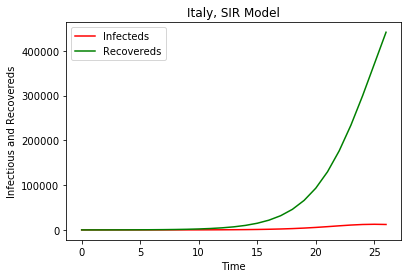

In [25]:
#Ploting
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.plot(RES[:,2], '-g', label='Recovereds')

pl.legend(loc=0)
pl.title('Italy, SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')

## Iteratible SIR Model

In [6]:
infected_Italy ={
'2020/2/15': 3,
'2020/2/16': 3,
'2020/2/17': 3,
'2020/2/18': 3,
'2020/2/19': 3,
'2020/2/20': 4,
'2020/2/21': 21,
'2020/2/22': 79,
'2020/2/23': 157,
'2020/2/24': 229,
'2020/2/25': 323,
'2020/2/26': 470,
'2020/2/27': 655,
'2020/2/28': 889,
'2020/2/29': 1128,
'2020/3/1': 1701,
'2020/3/2': 2036,
'2020/3/3': 2502,
'2020/3/4': 3089,
'2020/3/5': 3858,
'2020/3/6': 4636,
'2020/3/7': 5883,
'2020/3/8': 7375,
'2020/3/9': 9172,
'2020/3/10': 10149,
'2020/3/11': 12462,
'2020/3/12': 15113
}

In [7]:
observed = np.array(list(infected_Italy.values()))

In [8]:
t_start = 0.0
t_end = 27       # Transmit Time

N = 6*math.pow(10,6)
R0 = 0
I0 = 3      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

def model_SIR(INP,t):  
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint

t_range = np.arange(t_start, t_end)

In [10]:
minimum = 10000
for beta in np.arange(4.0, 12.0, 0.01):
    for gamma in np.arange(4.0, 12.0, 0.01):
        RES = spi.odeint(model_SIR, INPUT, t_range) 
        
        fitness = stats.chisquare(observed, RES[:,1])
        if fitness[0] < 5000 and fitness[0] > 0:
            print('beta=', beta, '  gamma=', gamma, fitness)
            
        if fitness[0] < minimum and fitness[0]>0:
            minimum = fitness[0]
            beta_mini = beta
            gamma_mini = gamma
            
print('The minimum is ', minimum)
print('when beta is ', beta_mini)
print('when gamma is ', gamma_mini)

beta= 5.87999999999996   gamma= 5.489999999999968 Power_divergenceResult(statistic=4989.911396143718, pvalue=0.0)
beta= 5.88999999999996   gamma= 5.499999999999968 Power_divergenceResult(statistic=4969.465292392733, pvalue=0.0)
beta= 5.8999999999999595   gamma= 5.509999999999968 Power_divergenceResult(statistic=4950.038763694727, pvalue=0.0)
beta= 5.909999999999959   gamma= 5.519999999999968 Power_divergenceResult(statistic=4931.632091902292, pvalue=0.0)
beta= 5.919999999999959   gamma= 5.529999999999967 Power_divergenceResult(statistic=4914.245724446312, pvalue=0.0)
beta= 5.929999999999959   gamma= 5.539999999999967 Power_divergenceResult(statistic=4897.879595678252, pvalue=0.0)
beta= 5.939999999999959   gamma= 5.549999999999967 Power_divergenceResult(statistic=4882.534161608618, pvalue=0.0)
beta= 5.949999999999958   gamma= 5.559999999999967 Power_divergenceResult(statistic=4868.209701966832, pvalue=0.0)
beta= 5.959999999999958   gamma= 5.5699999999999665 Power_divergenceResult(statis

In [ ]:
#Ploting
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.plot(RES[:,2], '-g', label='Recovereds')

pl.legend(loc=0)
pl.title('Italy, SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')